In [2]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [6]:
df_raw=pd.read_csv('yelp.csv')

In [7]:
df_raw.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## First we take a look at the basic summary statistics
We see there are about 10,000 reviews. Average stars is 3.8

In [8]:
df_raw.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## Then we check the uniqueness
There are 4174 business being rated by 6403 customers. Total number of unique reviews are 10,000. There is no duplicate in the data

In [9]:
print(df_raw['business_id'].nunique())
print(df_raw['review_id'].nunique())
print(df_raw['user_id'].nunique())

4174
10000
6403


Let's check the correlation between useful cool and funny. We see there are large outliers for each variable. We would remove those outliers and check the distribution again. However, from the pairplot, we see strong correlation between three variables

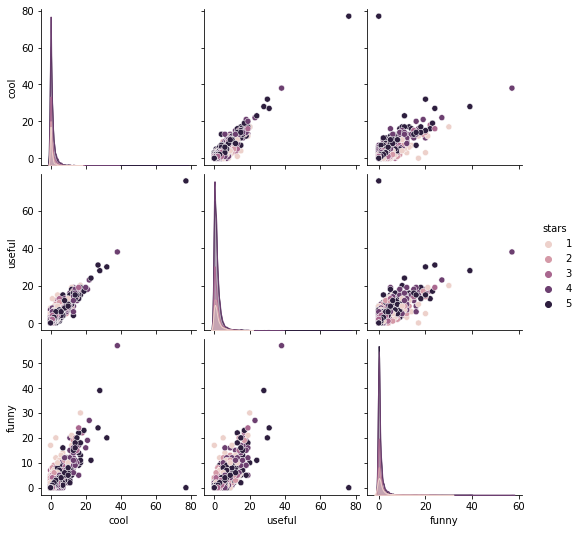

In [17]:
import seaborn as sns
sns.pairplot(df_raw[['cool', 'useful', 'funny','stars']],hue='stars')

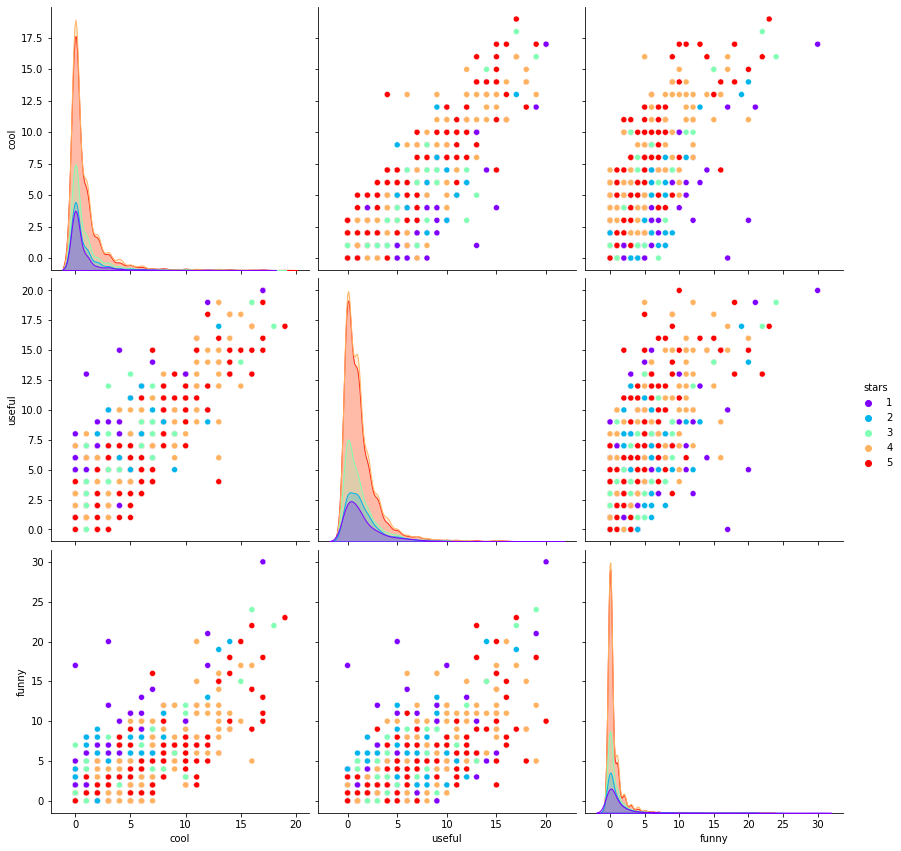

In [39]:
sns.pairplot(df_raw[df_raw.cool<20][['cool', 'useful', 'funny','stars']],hue='stars',height=4,palette='rainbow')

In [24]:
print('useful:', df_raw[df_raw['useful']>40])
print('cool:',df_raw[df_raw['cool']>40])
print('funny:',df_raw[df_raw['funny']>40])

useful:                  business_id        date               review_id  stars  \
4957  gqLWBFxOKag8dXwVxEvTrg  2011-10-03  1kc50TqtMsIHDGR8yQgF8g      5   

                                                text    type  \
4957  Love this place! Amazing Happy Hour Specials!!  review   

                     user_id  cool  useful  funny  
4957  73eZuIuXVD5sif7GrIMfuQ    77      76      0  
cool:                  business_id        date               review_id  stars  \
4957  gqLWBFxOKag8dXwVxEvTrg  2011-10-03  1kc50TqtMsIHDGR8yQgF8g      5   

                                                text    type  \
4957  Love this place! Amazing Happy Hour Specials!!  review   

                     user_id  cool  useful  funny  
4957  73eZuIuXVD5sif7GrIMfuQ    77      76      0  
funny:                  business_id        date               review_id  stars  \
9634  1NZLxU5WvB5roPFzneAlLw  2008-09-19  nQHI2kQElYrMWrPBqdwE4w      4   

                                                   text    t

## Now we go deeper into the mail text, first we will look into the length

In [41]:
df_raw['mail_length']=df_raw['text'].apply(len)

In [42]:
df_raw.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,mail_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


<AxesSubplot:xlabel='mail_length', ylabel='Count'>

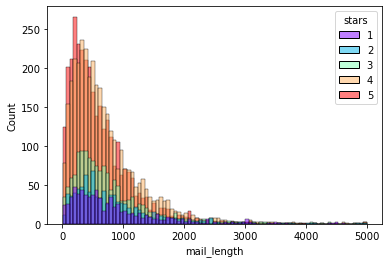

In [44]:
sns.histplot(data=df_raw,x='mail_length',hue='stars',palette='rainbow')

Until now we see most ratinngs are 4 and 5

In [45]:
df_raw.groupby('stars').count()

,business_id,date,review_id,text,type,user_id,cool,useful,funny,mail_length
stars,,,,,,,,,,
1,749,749,749,749,749,749,749,749,749,749
2,927,927,927,927,927,927,927,927,927,927
3,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461
4,3526,3526,3526,3526,3526,3526,3526,3526,3526,3526
5,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337


We might include only one of the cool usefull and funny

<AxesSubplot:>

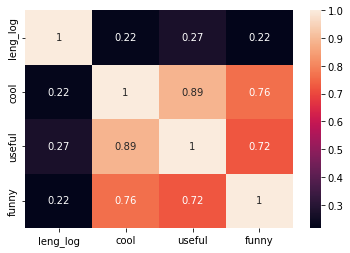

In [56]:
df_raw['leng_log']=np.log(df_raw['mail_length'])
matrix=df_raw[['leng_log','cool','useful','funny']].corr()
sns.heatmap(matrix,annot=True)

## Now we are going to transform the "text" as a bag of words using CountVectorizer

CountVectorizer is used in this process.
We want to exclude the punctuations and stopwords as well, so we need to import stopwords ad strings

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [80]:
stops = stopwords.words('english')

def text_adjust(mail):
    nopunc = [char for char in mail if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [char for char in nopunc.split() if char.lower() not in stops]
    return stopwords
    

In [81]:
print(text_adjust("Stop eating booger! Raymond!"))


['Stop', 'eating', 'booger', 'Raymond']


In [82]:
print(df_raw['text'].iloc[1])

I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.

In any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here's The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone

In [83]:
print(text_adjust(df_raw['text'].iloc[1]))

['idea', 'people', 'give', 'bad', 'reviews', 'place', 'goes', 'show', 'please', 'everyone', 'probably', 'griping', 'something', 'faultthere', 'many', 'people', 'like', 'case', 'friend', 'arrived', '550', 'PM', 'past', 'Sunday', 'pretty', 'crowded', 'thought', 'Sunday', 'evening', 'thought', 'would', 'wait', 'forever', 'get', 'seat', 'said', 'well', 'seated', 'girl', 'comes', 'back', 'seating', 'someone', 'else', 'seated', '552', 'waiter', 'came', 'got', 'drink', 'orders', 'Everyone', 'pleasant', 'host', 'seated', 'us', 'waiter', 'server', 'prices', 'good', 'well', 'placed', 'orders', 'decided', 'wanted', '602', 'shared', 'baked', 'spaghetti', 'calzone', 'small', 'Heres', 'Beef', 'pizza', 'try', 'calzone', 'huge', 'got', 'smallest', 'one', 'personal', 'got', 'small', '11', 'pizza', 'awesome', 'friend', 'liked', 'pizza', 'better', 'liked', 'calzone', 'better', 'calzone', 'sweetish', 'sauce', 'thats', 'like', 'sauce', 'box', 'part', 'pizza', 'take', 'home', 'door', '642', 'everything', 'g

In [84]:
Mail_transpose=CountVectorizer(analyzer=text_adjust).fit(df_raw['text'])

There are 44012 unique words used in this review dataset

In [88]:
len(Mail_transpose.vocabulary_)

44012

In [95]:
X1=Mail_transpose.transform(df_raw['text'])

Now we have a sparse matrix of word used in the review. We can use the sparse matrix to fit a model

In [96]:
X1

<10000x44012 sparse matrix of type '<class 'numpy.int64'>'
	with 583230 stored elements in Compressed Sparse Row format>

## We can also use TF IDF for vectorize

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
Mail_transpose2=TfidfVectorizer(analyzer=text_adjust).fit(df_raw['text'])

We have the same set of vocabulary but in different metrics. 

TF(term, document) = (Number of times term appears in document) / (Total number of terms in document)

IDF(term) = log_e(Total number of documents / Number of documents containing the term)

TF-IDF normalizes the term frequencies based on the inverse document frequency, reducing the impact of document length variations. This helps to mitigate the bias towards longer documents that may occur with raw term frequencies.


In [99]:
len(Mail_transpose2.vocabulary_)

44012

In [100]:
X2=Mail_transpose2.transform(df_raw['text'])

## 